In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.tree import  plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeRegressor

In [2]:
HR = pd.read_csv('HR_comma_sep.csv')
dum_HR = pd.get_dummies(HR,drop_first=True)

X = dum_HR.drop('left',axis=1)
y = dum_HR['left']

In [7]:
from sklearn.ensemble import RandomForestClassifier


rf =RandomForestClassifier(random_state=23)
params = {'max_features':[3, 4, 5, 6]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(rf, param_grid=params, scoring='neg_log_loss', cv=kfold, verbose=3)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5] END ....................max_features=3;, score=0.989 total time=   1.1s
[CV 2/5] END ....................max_features=3;, score=0.991 total time=   1.0s
[CV 3/5] END ....................max_features=3;, score=0.991 total time=   0.9s
[CV 4/5] END ....................max_features=3;, score=0.991 total time=   0.9s
[CV 5/5] END ....................max_features=3;, score=0.988 total time=   0.9s
[CV 1/5] END ....................max_features=4;, score=0.990 total time=   1.1s
[CV 2/5] END ....................max_features=4;, score=0.993 total time=   1.0s
[CV 3/5] END ....................max_features=4;, score=0.991 total time=   1.0s
[CV 4/5] END ....................max_features=4;, score=0.992 total time=   1.0s
[CV 5/5] END ....................max_features=4;, score=0.991 total time=   1.0s
[CV 1/5] END ....................max_features=5;, score=0.991 total time=   1.1s
[CV 2/5] END ....................max_features=5;,

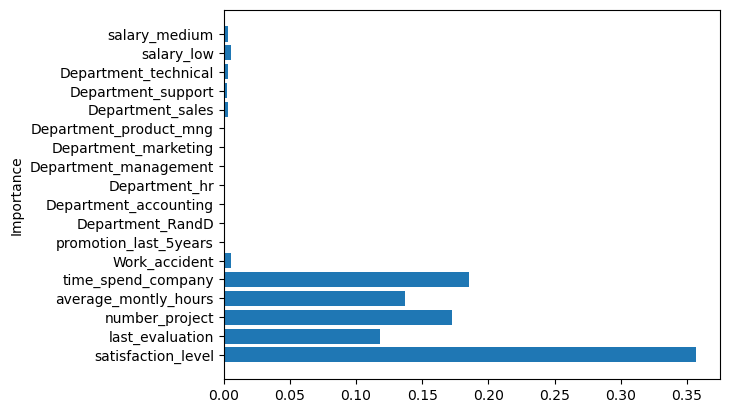

In [8]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=False)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()

For comparison

In [5]:
from sklearn.tree import DecisionTreeClassifier


dtc =DecisionTreeClassifier(random_state=23)
params = {'max_depth':[3, 4, 5, 6], 'min_samples_split':[2,5,10], 'min_samples_leaf':[1,3,5,7,10,15]}
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=23)
gcv = GridSearchCV(dtc, param_grid=params, scoring='neg_log_loss', cv=kfold)
gcv.fit(X,y)
print(gcv.best_params_)
print(gcv.best_score_)

{'max_depth': 6, 'min_samples_leaf': 3, 'min_samples_split': 10}
-0.10757957256759484


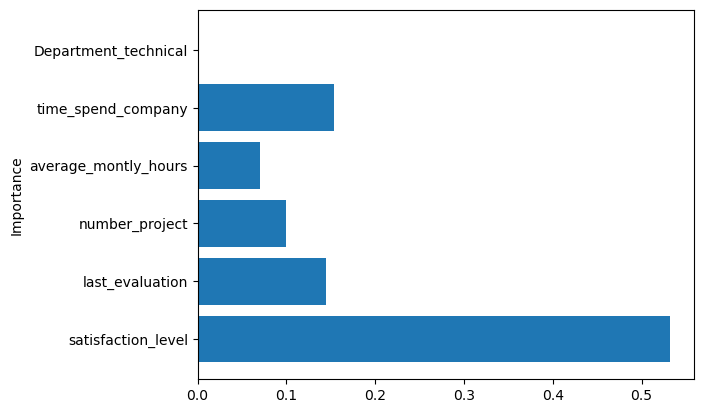

In [6]:
best_model = gcv.best_estimator_

df_imp = pd.DataFrame({'variable':best_model.feature_names_in_, 'importance':best_model.feature_importances_})
df_imp = df_imp[df_imp['importance']>0.0001]
df_imp.sort_values(by='importance',ascending=False)
plt.barh(df_imp['variable'],df_imp['importance'])
plt.ylabel('Importance')
plt.show()